Epoch 1/20


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9983 - loss: 0.1017 - val_accuracy: 0.9983 - val_loss: 0.0044
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9983 - val_loss: 0.0037
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9982 - loss: 0.0039 - val_accuracy: 0.9983 - val_loss: 0.0035
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9981 - loss: 0.0036 - val_accuracy: 0.9983 - val_loss: 0.0035
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9982 - loss: 0.0035 - val_accuracy: 0.9983 - val_loss: 0.0034
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9983 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 0.0034
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9984 - loss: 0.0030 - val_accuracy: 0.9983 - val_loss: 0.0035
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9984 - loss: 0.0031 - val_accuracy: 0.999

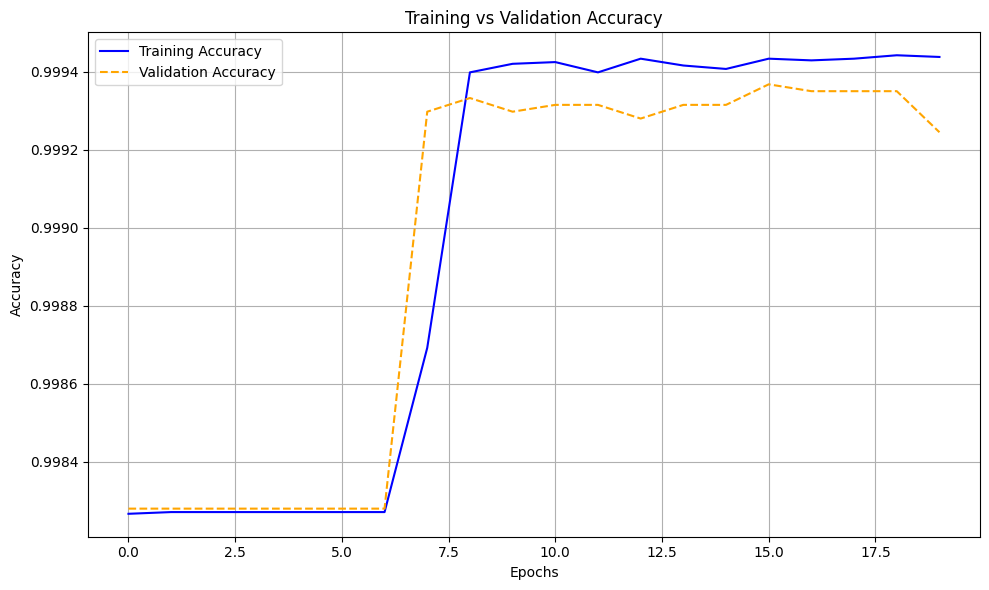

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting

# 1. Load the dataset
df = pd.read_csv('creditcard.csv')  # Ensure the correct path

# 2. Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reshape for Conv1D input: (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Define a simple 5-layer CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 7. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 8. Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    validation_data=(X_test, y_test),
    verbose=1
)

# 9. Final accuracy values
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Accuracy:   {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# 10. Plot training and validation accuracy vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
